In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO USE THE FEATURE ENGINEERING
df['total_call'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

# Create 'total_charges' feature
df['total_charges'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Create 'total_minutes' feature
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df = df.drop(['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1)

# Delete contributing features for 'total_charges'
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge'], axis=1)

# Delete contributing features for 'total_minutes'
df = df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], axis=1)


df.drop(['state','area_code'], axis=1, inplace=True)
# df.drop(['state', 'area_code', 'account_length'], axis=1, inplace=True)



###################

###ONE HOT ENCODING


# df = pd.get_dummies(df, columns=['area_code'])


### MOVING THE Y VARIABLE TO THE END
churn = df['churn']
df = df.drop('churn', axis=1)
df['churn'] = churn


data=np.array(df)


data[data=='no']=0
data[data=='yes']=1
data[data==False]=0
data[data==True]=1
print(data[0])
X=data[:,:-1]
y=data[:,-1]



### SPLITTING THE DATA INTO TRAIN, VALIDATION AND TEST SETS

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

###DATA NORMALIZATION
def normalize(X):
    X = X.astype(float)
    X=(X-X.mean(axis=0))/X.std(axis=0)
    return X

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)


#SMOTE, oversampling the minority class (will read more about this later)
X_train_oversampled_smote = []
labels_train_oversampled_smote = []
indices_0 = np.where(y_train == 0)[0]
indices_1 = np.where(y_train == 1)[0]
indices = np.concatenate([indices_0, indices_1])
for _ in range(X_train.shape[0]):
    p = np.random.random()
    #sample from majority class
    if p < 0.5:
        X_train_oversampled_smote.append(X_train[np.random.choice(indices_0)])
        labels_train_oversampled_smote.append(0)
    #sample from minority class
    else:
        #get two random samples from minority class
        minority_samp_1 = X_train[np.random.choice(indices_1)]
        minority_samp_2 = X_train[np.random.choice(indices_1)]
        
        #get random proportion with which to mix them
        prop = np.random.random()
        
        #generate synthetic sample from minority class
        synthetic_minority_samp = prop*minority_samp_1 + (1-prop)*minority_samp_2
        X_train_oversampled_smote.append(synthetic_minority_samp)
        labels_train_oversampled_smote.append(1)
        
X_train_with_SMOTE = np.array(X_train_oversampled_smote)
y_train_with_SMOTE = np.array(labels_train_oversampled_smote)

X_train_with_SMOTE = X_train_with_SMOTE.astype(np.float32)
y_train_with_SMOTE = y_train_with_SMOTE.astype(np.float32)
y_train_with_SMOTE = y_train_with_SMOTE.reshape(-1,1)



###CONVERT TO APPROPIATE FORMAT
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)
####




[107 0 1 26 13.7 3 3.7 1 329 55.540000000000006 611.5 0]


In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO USE THE FEATURE ENGINEERING
df['total_call'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

# Create 'total_charges' feature
df['total_charges'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Create 'total_minutes' feature
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df = df.drop(['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1)

# Delete contributing features for 'total_charges'
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge'], axis=1)

# Delete contributing features for 'total_minutes'
df = df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], axis=1)


df.drop(['state','area_code'], axis=1, inplace=True)
# df.drop(['state', 'area_code', 'account_length'], axis=1, inplace=True)



###################

###ONE HOT ENCODING


# df = pd.get_dummies(df, columns=['area_code'])


### MOVING THE Y VARIABLE TO THE END
churn = df['churn']
df = df.drop('churn', axis=1)
df['churn'] = churn


data=np.array(df)


data[data=='no']=0
data[data=='yes']=1
data[data==False]=0
data[data==True]=1

X=data[:,:-1]
y=data[:,-1]



### SPLITTING THE DATA INTO TRAIN, VALIDATION AND TEST SETS

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

###DATA NORMALIZATION
def normalize(X):
    X = X.astype(float)
    X=(X-X.mean(axis=0))/X.std(axis=0)
    return X

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)


#SMOTE, oversampling the minority class (will read more about this later)
X_train_oversampled_smote = []
labels_train_oversampled_smote = []
indices_0 = np.where(y_train == 0)[0]
indices_1 = np.where(y_train == 1)[0]
indices = np.concatenate([indices_0, indices_1])
for _ in range(X_train.shape[0]):
    p = np.random.random()
    #sample from majority class
    if p < 0.5:
        X_train_oversampled_smote.append(X_train[np.random.choice(indices_0)])
        labels_train_oversampled_smote.append(0)
    #sample from minority class
    else:
        #get two random samples from minority class
        minority_samp_1 = X_train[np.random.choice(indices_1)]
        minority_samp_2 = X_train[np.random.choice(indices_1)]
        
        #get random proportion with which to mix them
        prop = np.random.random()
        
        #generate synthetic sample from minority class
        synthetic_minority_samp = prop*minority_samp_1 + (1-prop)*minority_samp_2
        X_train_oversampled_smote.append(synthetic_minority_samp)
        labels_train_oversampled_smote.append(1)
        
X_train_with_SMOTE = np.array(X_train_oversampled_smote)
y_train_with_SMOTE = np.array(labels_train_oversampled_smote)

X_train_with_SMOTE = X_train_with_SMOTE.astype(np.float32)
y_train_with_SMOTE = y_train_with_SMOTE.astype(np.float32)
y_train_with_SMOTE = y_train_with_SMOTE.reshape(-1,1)

def get_precisions_recalls(actual, preds):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    precision_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(preds == 0)
    precision_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(preds == 1)
    
    plt.bar([0,1], [precision_0, precision_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Precision', fontsize=20)
    plt.title(f'Precision Class 0: {round(precision_0,2)}\nPrecision Class 1: {round(precision_1,2)}', fontsize=20)
    
    plt.subplot(1,2,2)
    recall_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(actual == 0)
    recall_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(actual == 1)
    
    plt.bar([0,1], [recall_0, recall_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Recall', fontsize=20)
    plt.title(f'Recall Class 0: {round(recall_0,2)}\nRecall Class 1: {round(recall_1,2)}', fontsize=20)
    
    plt.tight_layout()
    plt.show()



####OVERSAMPLING THE MINORITY CLASS
weight_minority_class = np.sum(y_train == 0) / np.sum(y_train == 1)
print(weight_minority_class)

X_train_oversampled = []
y_train_oversampled = []

indices_0 = np.where(y_train == 0)[0]
indices_1 = np.where(y_train == 1)[0]
indices = np.concatenate([indices_0, indices_1])

#get weights for each class
weights = np.empty(y_train.shape[0])
weights[:indices_0.shape[0]] = 1
weights[indices_0.shape[0]:] = weight_minority_class
weights = weights/np.sum(weights)

#sample new indices
sampled_indices = np.random.choice(indices, indices.shape[0], p=weights)
X_train_oversampled = X_train[sampled_indices]
y_train_oversampled = y_train[sampled_indices]


###CONVERT TO APPROPIATE FORMAT
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)
####

unique_rows = np.unique(X_train_oversampled, axis=0)
num_unique_rows = unique_rows.shape[0]

X_train.shape
print(df.columns)
pd.DataFrame(X_train).describe().map(lambda x: format(x, '.4f'))


6.382133995037221
Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'total_call',
       'total_charges', 'total_minutes', 'churn'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,10
count,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000,2975.0000
mean,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-2.5089,-0.3185,-0.5940,-0.5668,-3.7385,-1.8153,-3.7393,-1.1951,-3.2346,-3.5775,-3.2702
25%,-0.6964,-0.3185,-0.5940,-0.5668,-0.6378,-0.5907,-0.6317,-0.4255,-0.6886,-0.6898,-0.6775
50%,-0.0167,-0.3185,-0.5940,-0.5668,0.0189,-0.1825,0.0168,-0.4255,0.0057,0.0104,0.0222
75%,0.6629,-0.3185,1.6834,0.5535,0.6390,0.6339,0.6383,0.3440,0.6711,0.6612,0.6803
max,3.5830,3.1397,1.6834,3.1676,3.3020,6.3489,3.3000,5.7310,3.1882,3.5201,3.3181


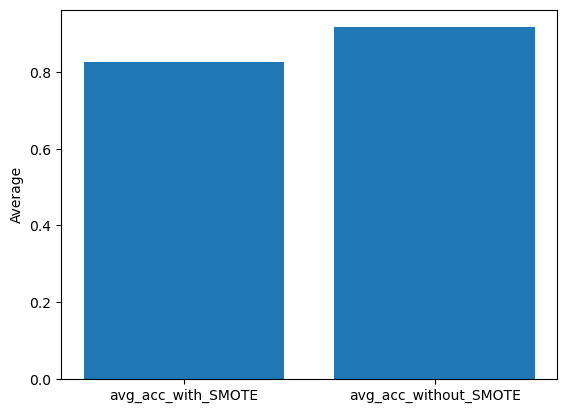

In [16]:
avg_with_SMOTE=0.8259026687598116
avg_without_SMOTE=0.9161695447409735

import matplotlib.pyplot as plt

# Values
avg_with_SMOTE = 0.8259026687598116
avg_without_SMOTE = 0.9161695447409735

# Calculate difference
difference = avg_without_SMOTE - avg_with_SMOTE

# Plot
plt.bar(['avg_acc_with_SMOTE', 'avg_acc_without_SMOTE'], [avg_with_SMOTE, avg_without_SMOTE])

plt.ylabel('Average')
plt.title('')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot the dataframe
df.plot(x='Name', y='Age', kind='bar')

# Save the plot as an image file
plt.savefig('plot.png')


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# Print the name of the most important features
print("The 5 most important features are:")
for feature, importance in zip(df.columns, rf.feature_importances_):
    print(f"{feature}: {importance:.3f}")
    
# Print the accuracy of the model
print(f"The accuracy of the model is {rf.score(X_val, y_val):.3f}")

# Test the model on the validation set
val_accuracy = rf.score(X_val, y_val)
print(f"The accuracy of the model on the validation set is: {val_accuracy:.3f}")

# Test the model on the test set
test_accuracy = rf.score(X_test, y_test)
print(f"The accuracy of the model on the test set is: {test_accuracy:.3f}")



The 5 most important features are:
account_length: 0.041
international_plan: 0.084
voice_mail_plan: 0.037
number_vmail_messages: 0.042
total_intl_minutes: 0.048
total_intl_calls: 0.064
total_intl_charge: 0.052
number_customer_service_calls: 0.143
total_call: 0.036
total_charges: 0.327
total_minutes: 0.126
The accuracy of the model is 0.962
The accuracy of the model on the validation set is: 0.962
The accuracy of the model on the test set is: 0.969


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


df =pd.read_csv('test.csv')

### UNCOMMENT THIS PART TO USE THE FEATURE ENGINEERING
df['total_call'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

# Create 'total_charges' feature
df['total_charges'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Create 'total_minutes' feature
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df = df.drop(['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1)

# Delete contributing features for 'total_charges'
df = df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge'], axis=1)

# Delete contributing features for 'total_minutes'
df = df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], axis=1)


df.drop(['state','id','area_code'], axis=1, inplace=True)
# df.drop(['state', 'area_code', 'account_length'], axis=1, inplace=True)



###################

###ONE HOT ENCODING
# df = pd.get_dummies(df, columns=['area_code'])

###################

###ONE HOT ENCODING
#df = pd.get_dummies(df, columns=['area_code','state'])


### MOVING THE Y VARIABLE TO THE END


data=np.array(df)


data[data=='no']=0
data[data=='yes']=1
data[data==False]=0
data[data==True]=1
X=data


### SPLITTING THE DATA INTO TRAIN, VALIDATION AND TEST SETS

###DATA NORMALIZATION
def normalize(X):
    X = X.astype(np.float32)
    X=(X-X.mean(axis=0))/X.std(axis=0)
    return X
X=normalize(X)

y_pred = rf.predict(X)
print(y_pred)
y_pred=np.where(y_pred==1,'yes','no')
id_column = np.arange(1, y_pred.shape[0] + 1)


# Create a DataFrame
df_output = pd.DataFrame({
    'id': id_column,
    'churn': y_pred
})


# Save the DataFrame as a CSV file
df_output.to_csv('output_rf.csv', index=False)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.